# Exploratory Analysis


In [5]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

plt.style.use('seaborn')

## Read data

In [22]:
# images
h, w = 200, 200 # height and width of images
path = 'data/UTKFace/'
data = [ImageOps.grayscale(Image.open(path+img)) for img in os.listdir(path)]
X = np.stack(data).reshape(len(data), -1)

# labels
labels = pd.read_csv("data/info.csv")
gender_dict = {0:"male", 1:"female"}
race_dict = {0:"white", 1:"black", 2:"asian", 3:"indian", 4:"others"}

# split in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, labels[["age", "gender", "race"]], test_size = .9)

## Data distributions

[Text(0, 0, 'WHITE'),
 Text(1, 0, 'BLACK'),
 Text(2, 0, 'ASIAN'),
 Text(3, 0, 'INDIAN'),
 Text(4, 0, 'OTHERS')]

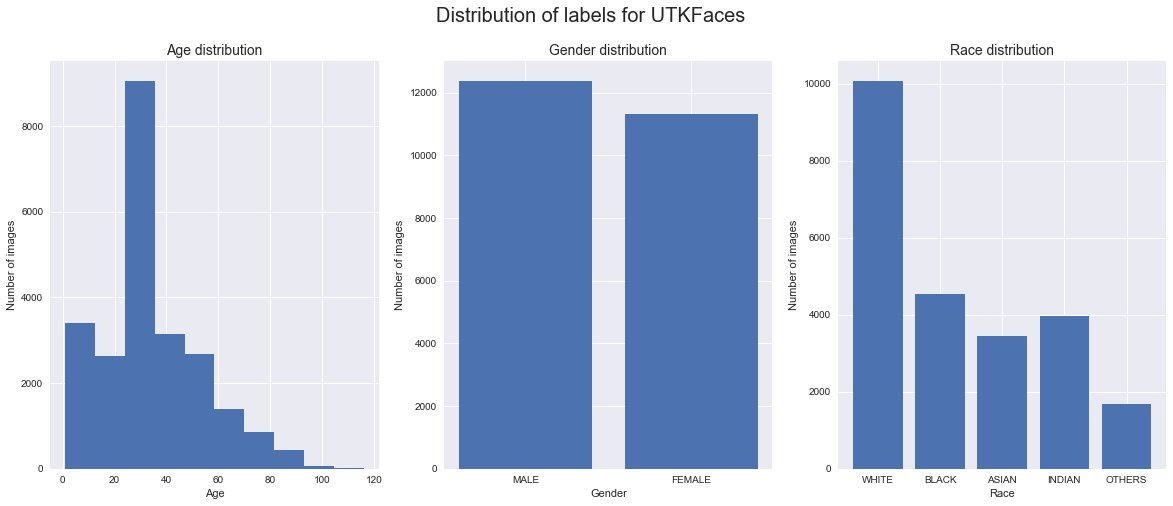

In [4]:
fig, ax = plt.subplots(1,3,figsize = (20, 7.5))

fig.suptitle("Distribution of labels for UTKFaces", fontsize = 20)# fontdict = {"size":20})

ax[0].hist(labels.age)
ax[0].set_title("Age distribution", fontsize = 14)
ax[0].set_ylabel("Number of images")
ax[0].set_xlabel("Age")

genders, counts = np.unique(labels.gender, return_counts=True)
ax[1].bar(genders, counts)
ax[1].set_title("Gender distribution", fontsize = 14)
ax[1].set_ylabel("Number of images")
ax[1].set_xlabel("Gender")
ax[1].set_xticks(genders)
ax[1].set_xticklabels([gender_dict[gender].upper() for gender in genders])


races, counts = np.unique(labels.race, return_counts=True)
ax[2].bar(races, counts)
ax[2].set_title("Race distribution", fontsize = 14)
ax[2].set_ylabel("Number of images")
ax[2].set_xlabel("Race")
ax[2].set_xticks(races)
ax[2].set_xticklabels([race_dict[race].upper() for race in races])

## PCA

In [37]:
# PCA on X
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)
x = (X_train-mu)/sigma

n_components = 150
pca = PCA(n_components = n_components).fit(x)



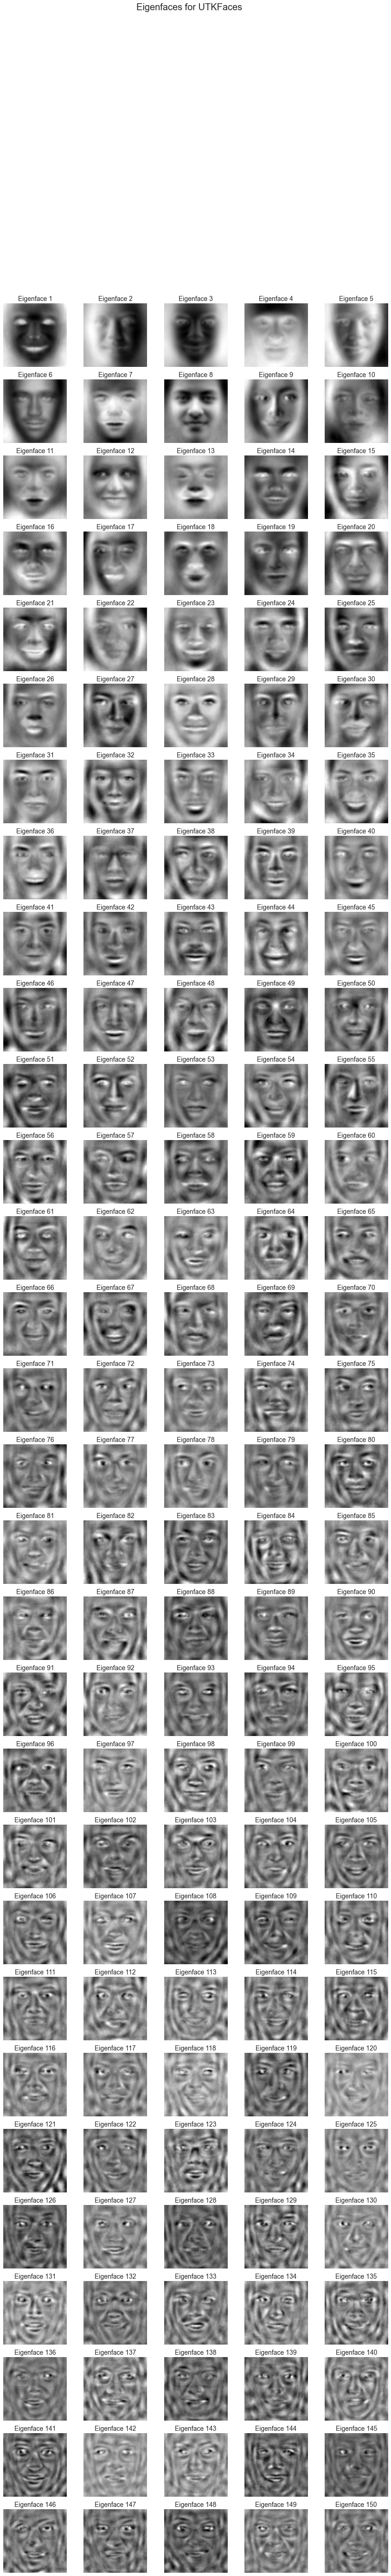

In [40]:
eigenfaces = pca.components_.reshape((n_components, h, w))

ncols = 5
nrows = eigenfaces.shape[0]//ncols

fig, ax = plt.subplots(nrows, ncols, figsize = (3*ncols, 3*nrows))
fig.suptitle("Eigenfaces for UTKFaces", fontsize = 20)
for i in range(n_components):
    ax[i//ncols, i%ncols].imshow(eigenfaces[i], cmap = "gray")
    ax[i//ncols, i%ncols].set_title("Eigenface {}".format(i+1), fontsize = 14)
    ax[i//ncols, i%ncols].axis("off")


In [34]:
eigenfaces.shape[0]//ncols

5